# Практическая работа

# Задача

Один из способов повысить эффективность взаимодействия банка с клиентами — отправлять предложение о новой услуге не всем клиентам, а только некоторым, которые выбираются по принципу наибольшей склонности к отклику на это предложение.

Задача заключается в том, чтобы предложить алгоритм, который будет выдавать склонность клиента к положительному или отрицательному отклику на предложение банка. Предполагается, что, получив такие оценки для некоторого множества клиентов, банк обратится с предложением только к тем, от кого ожидается положительный отклик.


Для решения этой задачи загрузите файлы из базы в Postgres.
Эта БД хранит информацию о клиентах банка и их персональные данные, такие как пол, количество детей и другие.

Описание таблиц с данными представлено ниже.


**D_work**

Описание статусов относительно работы:
- ID — идентификатор социального статуса клиента относительно работы;
- COMMENT — расшифровка статуса.


**D_pens** - не использовать (см в переписку в тг)

Описание статусов относительно пенсии:
- ID — идентификатор социального статуса;
- COMMENT — расшифровка статуса.


**D_clients**

Описание данных клиентов:
- ID — идентификатор записи;
- AGE	— возраст клиента;
- GENDER — пол клиента (1 — мужчина, 0 — женщина);
- EDUCATION — образование;
- MARITAL_STATUS — семейное положение;
- CHILD_TOTAL	— количество детей клиента;
- DEPENDANTS — количество иждивенцев клиента;
- SOCSTATUS_WORK_FL	— социальный статус клиента относительно работы (1 — работает, 0 — не работает);
- SOCSTATUS_PENS_FL	— социальный статус клиента относительно пенсии (1 — пенсионер, 0 — не пенсионер);
- REG_ADDRESS_PROVINCE — область регистрации клиента;
- FACT_ADDRESS_PROVINCE — область фактического пребывания клиента;
- POSTAL_ADDRESS_PROVINCE — почтовый адрес области;
- FL_PRESENCE_FL — наличие в собственности квартиры (1 — есть, 0 — нет);
- OWN_AUTO — количество автомобилей в собственности.


**D_target**

Таблица с зафиксированными откликами клиентов на предложения банка:
- AGREEMENT_RK — уникальный идентификатор объекта в выборке;
- ID_CLIENT — идентификатор клиента;
- TARGET — целевая переменная: отклик на маркетинговую кампанию (1 — отклик был зарегистрирован, 0 — отклика не было).
    
    
**D_job**

Описание информации о работе клиентов:
- GEN_INDUSTRY — отрасль работы клиента;
- GEN_TITLE — должность;
- JOB_DIR — направление деятельности внутри компании;
- WORK_TIME — время работы на текущем месте (в месяцах);
- ID_CLIENT — идентификатор клиента.


**D_salary**

Описание информации о заработной плате клиентов:
- ID_CLIENT — идентификатор клиента;
- FAMILY_INCOME — семейный доход (несколько категорий);
- PERSONAL_INCOME — личный доход клиента (в рублях).


**D_last_credit**

Информация о последнем займе клиента:
- ID_CLIENT — идентификатор клиента;
- CREDIT — сумма последнего кредита клиента (в рублях);
- TERM — срок кредита;
- FST_PAYMENT — первоначальный взнос (в рублях).


**D_loan**

Информация о кредитной истории клиента:
- ID_CLIENT — идентификатор клиента;
- ID_LOAN — идентификатор кредита.

**D_close_loan**

Информация о статусах кредита (ссуд):
- ID_LOAN — идентификатор кредита;
- CLOSED_FL — текущий статус кредита (1 — закрыт, 0 — не закрыт).

Ниже представлен минимальный список колонок, которые должны находиться в итоговом датасете после склейки и агрегации данных. По своему усмотрению вы можете добавить дополнительные к этим колонки.

    - AGREEMENT_RK — уникальный идентификатор объекта в выборке;
    - TARGET — целевая переменная: отклик на маркетинговую кампанию (1 — отклик был зарегистрирован, 0 — отклика не было);
    - AGE — возраст клиента;
    - SOCSTATUS_WORK_FL — социальный статус клиента относительно работы (1 — работает, 0 — не работает);
    - SOCSTATUS_PENS_FL — социальный статус клиента относительно пенсии (1 — пенсионер, 0 — не пенсионер);
    - GENDER — пол клиента (1 — мужчина, 0 — женщина);
    - CHILD_TOTAL — количество детей клиента;
    - DEPENDANTS — количество иждивенцев клиента;
    - PERSONAL_INCOME — личный доход клиента (в рублях);
    - LOAN_NUM_TOTAL — количество ссуд клиента;
    - LOAN_NUM_CLOSED — количество погашенных ссуд клиента.


Будьте внимательны при сборке датасета: это реальные банковские данные, в которых могут наблюдаться дубли, некорректно заполненные значения или значения, противоречащие друг другу. Для получения качественной модели необходимо предварительно очистить датасет от такой информации.

## Задание 1

Соберите всю информацию о клиентах в одну таблицу, где одна строчка соответствует полной информации об одном клиенте.

## Задание 2

При помощи инструмента Streamlit проведите разведочный анализ данных. В него может входить:

* построение графиков распределений признаков
* построение матрицы корреляций
* построение графиков зависимостей целевой переменной и признаков
* вычисление числовых характеристик распределения числовых столбцов (среднее, min, max, медиана и так далее)
* любые другие ваши идеи приветствуются!

[Пример Streamlit-приложения](https://rateyourflight.streamlit.app) с разведочным анализом, прогнозом модели и оценкой ее результатов.

# Собираем все информацию в одну таблицу

In [82]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
df1 = pd.read_csv('datasets/D_target.csv')
print(df1.columns) 
df1.head()

Index(['AGREEMENT_RK', 'ID_CLIENT', 'TARGET'], dtype='object')


,AGREEMENT_RK,ID_CLIENT,TARGET
0,59910150,106804370,0
1,59910230,106804371,0
2,59910525,106804372,0
3,59910803,106804373,0
4,59911781,106804374,0


In [7]:
df2 = pd.read_csv('datasets/D_clients.csv')
print(df2.columns)
df2.head()

Index(['ID', 'AGE', 'GENDER', 'EDUCATION', 'MARITAL_STATUS', 'CHILD_TOTAL',
       'DEPENDANTS', 'SOCSTATUS_WORK_FL', 'SOCSTATUS_PENS_FL',
       'REG_ADDRESS_PROVINCE', 'FACT_ADDRESS_PROVINCE',
       'POSTAL_ADDRESS_PROVINCE', 'FL_PRESENCE_FL', 'OWN_AUTO'],
      dtype='object')


,ID,AGE,GENDER,EDUCATION,MARITAL_STATUS,CHILD_TOTAL,DEPENDANTS,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,REG_ADDRESS_PROVINCE,FACT_ADDRESS_PROVINCE,POSTAL_ADDRESS_PROVINCE,FL_PRESENCE_FL,OWN_AUTO
0,106805103,42,1,Среднее,Не состоял в браке,1,0,1,0,Московская область,Московская область,Московская область,1,0
1,106809308,28,1,Среднее специальное,Состою в браке,1,1,1,0,Читинская область,Читинская область,Читинская область,0,0
2,106805867,64,0,Среднее специальное,Состою в браке,2,0,1,1,Иркутская область,Иркутская область,Иркутская область,0,1
3,106808779,54,1,Среднее специальное,Состою в браке,0,0,1,0,Новосибирская область,Новосибирская область,Новосибирская область,1,1
4,106814289,26,0,Среднее специальное,Состою в браке,1,1,1,0,Красноярский край,Красноярский край,Красноярский край,1,0


In [8]:
df3 = pd.read_csv('datasets/D_salary.csv')
print(df3.columns)
df3.head()

Index(['FAMILY_INCOME', 'PERSONAL_INCOME', 'ID_CLIENT'], dtype='object')


,FAMILY_INCOME,PERSONAL_INCOME,ID_CLIENT
0,от 20000 до 50000 руб.,20000.0,106809321
1,от 20000 до 50000 руб.,14000.0,106815561
2,от 10000 до 20000 руб.,15000.0,106811521
3,от 20000 до 50000 руб.,20000.0,106811252
4,от 20000 до 50000 руб.,25000.0,106808620


Колонок LOAN_NUM_TOTAL и LOAN_NUM_CLOSED в исходных датасетах нет, сделаем их из D_loan и D_close_loan

In [9]:
df4 = pd.read_csv('datasets/D_loan.csv')
df5 = pd.read_csv('datasets/D_close_loan.csv')

In [13]:
df6 = pd.merge(df4, df5, on="ID_LOAN")

In [29]:
df7 = df6.groupby('ID_CLIENT').CLOSED_FL.agg(["sum", "count"]).reset_index().rename(
        columns={"sum": "LOAN_NUM_CLOSED", "count": "LOAN_NUM_TOTAL"})

а теперь смерджим датасеты так, чтобы получить требуемые в задании колонки

In [35]:
total = pd.merge(df1, df2[['ID', 'AGE','SOCSTATUS_WORK_FL', 'SOCSTATUS_PENS_FL', 'GENDER', 'CHILD_TOTAL','DEPENDANTS']],  left_on='ID_CLIENT', right_on='ID').drop('ID', axis=1)

In [36]:
total = pd.merge(total, df3[['PERSONAL_INCOME', 'ID_CLIENT']], on="ID_CLIENT")

In [56]:
total.columns

Index(['AGREEMENT_RK', 'ID_CLIENT', 'TARGET', 'AGE', 'SOCSTATUS_WORK_FL',
       'SOCSTATUS_PENS_FL', 'GENDER', 'CHILD_TOTAL', 'DEPENDANTS',
       'PERSONAL_INCOME', 'LOAN_NUM_CLOSED', 'LOAN_NUM_TOTAL'],
      dtype='object')

In [38]:
total = pd.merge(total, df7, on="ID_CLIENT")

In [52]:
total.to_csv('total.csv', index=False)

# EDA

посмотрим на наши данные повнимательнее

In [60]:
total.dtypes

AGREEMENT_RK           int64
ID_CLIENT              int64
TARGET                 int64
AGE                    int64
SOCSTATUS_WORK_FL      int64
SOCSTATUS_PENS_FL      int64
GENDER                 int64
CHILD_TOTAL            int64
DEPENDANTS             int64
PERSONAL_INCOME      float64
LOAN_NUM_CLOSED        int64
LOAN_NUM_TOTAL         int64
dtype: object

In [54]:
total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15523 entries, 0 to 15522
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   AGREEMENT_RK       15523 non-null  int64  
 1   ID_CLIENT          15523 non-null  int64  
 2   TARGET             15523 non-null  int64  
 3   AGE                15523 non-null  int64  
 4   SOCSTATUS_WORK_FL  15523 non-null  int64  
 5   SOCSTATUS_PENS_FL  15523 non-null  int64  
 6   GENDER             15523 non-null  int64  
 7   CHILD_TOTAL        15523 non-null  int64  
 8   DEPENDANTS         15523 non-null  int64  
 9   PERSONAL_INCOME    15523 non-null  float64
 10  LOAN_NUM_CLOSED    15523 non-null  int64  
 11  LOAN_NUM_TOTAL     15523 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 1.4 MB


In [44]:
total.describe()

,AGREEMENT_RK,ID_CLIENT,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,PERSONAL_INCOME,LOAN_NUM_CLOSED,LOAN_NUM_TOTAL
count,1.552300e+04,1.552300e+04,15523.000000,15523.000000,15523.000000,15523.000000,15523.000000,15523.000000,15523.000000,15523.000000,15523.000000,15523.000000
mean,6.539832e+07,1.068120e+08,0.119371,40.400438,0.909360,0.134639,0.653997,1.098886,0.644850,13848.041638,0.751594,1.387296
std,4.569483e+06,4.395857e+03,0.324235,11.607242,0.287105,0.341348,0.475709,0.996748,0.812663,8998.618992,0.989253,0.794241
min,5.991015e+07,1.068044e+08,0.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24.000000,0.000000,1.000000
25%,6.191984e+07,1.068082e+08,0.000000,30.000000,1.000000,0.000000,0.000000,0.000000,0.000000,8000.000000,0.000000,1.000000
50%,6.436952e+07,1.068120e+08,0.000000,39.000000,1.000000,0.000000,1.000000,1.000000,0.000000,12000.000000,0.000000,1.000000
75%,6.708832e+07,1.068158e+08,0.000000,50.000000,1.000000,0.000000,1.000000,2.000000,1.000000,17000.000000,1.000000,2.000000
max,7.529224e+07,1.068196e+08,1.000000,67.000000,1.000000,1.000000,1.000000,10.000000,7.000000,250000.000000,11.000000,11.000000


In [45]:
total.columns

Index(['AGREEMENT_RK', 'ID_CLIENT', 'TARGET', 'AGE', 'SOCSTATUS_WORK_FL',
       'SOCSTATUS_PENS_FL', 'GENDER', 'CHILD_TOTAL', 'DEPENDANTS',
       'PERSONAL_INCOME', 'LOAN_NUM_CLOSED', 'LOAN_NUM_TOTAL'],
      dtype='object')

In [59]:
total.AGREEMENT_RK.nunique()

15223

In [58]:
total.ID_CLIENT.nunique()

15223

In [61]:
df1.AGREEMENT_RK.nunique()

15223

In [62]:
df1.ID_CLIENT.nunique()

15223

похоже, что идентификаторы совпадают, да и id клиента использовалось для мерджа, поэтому удалим его (и в требованиях к датасету не значится)

In [63]:
total.drop(['ID_CLIENT'], axis=1, inplace=True)

теперь посмотрим на дубли

In [64]:
total.drop(['TARGET'], axis=1).duplicated().sum()

300

дублей прилично, удалим их

In [68]:
total.drop_duplicates(subset=['AGREEMENT_RK', 'AGE', 'SOCSTATUS_WORK_FL',
       'SOCSTATUS_PENS_FL', 'GENDER', 'CHILD_TOTAL', 'DEPENDANTS',
       'PERSONAL_INCOME', 'LOAN_NUM_CLOSED', 'LOAN_NUM_TOTAL'], keep='first', inplace=True)

In [70]:
total.reset_index(drop=True, inplace=True)

посмотрим на пропуски

In [73]:
#а их и нет
total.isna().sum()

AGREEMENT_RK         0
TARGET               0
AGE                  0
SOCSTATUS_WORK_FL    0
SOCSTATUS_PENS_FL    0
GENDER               0
CHILD_TOTAL          0
DEPENDANTS           0
PERSONAL_INCOME      0
LOAN_NUM_CLOSED      0
LOAN_NUM_TOTAL       0
dtype: int64

оценим разнообразие значений у признаков

In [75]:
for i in total.columns:
    print(i)
    print(total[i].value_counts(normalize=True))
    print('***********')

AGREEMENT_RK
AGREEMENT_RK
59910150    0.000066
66705231    0.000066
66702164    0.000066
66702196    0.000066
66702304    0.000066
              ...   
62263585    0.000066
62263715    0.000066
62263880    0.000066
62263919    0.000066
75292242    0.000066
Name: proportion, Length: 15223, dtype: float64
***********
TARGET
TARGET
0    0.88097
1    0.11903
Name: proportion, dtype: float64
***********
AGE
AGE
27    0.031860
26    0.031531
33    0.030283
31    0.030283
30    0.030217
34    0.029889
35    0.029035
24    0.028707
32    0.028575
25    0.028247
38    0.028181
29    0.028050
37    0.027590
39    0.027261
28    0.027196
40    0.026670
23    0.024962
36    0.024699
42    0.024502
44    0.023845
41    0.023845
45    0.023517
48    0.023517
50    0.023123
51    0.022926
52    0.022926
49    0.022860
53    0.022269
43    0.022006
56    0.021940
47    0.021021
46    0.020561
54    0.019379
22    0.019182
55    0.018984
57    0.018590
58    0.018130
59    0.014189
61    0.013926
60   

визуализируем  попарные распределения 

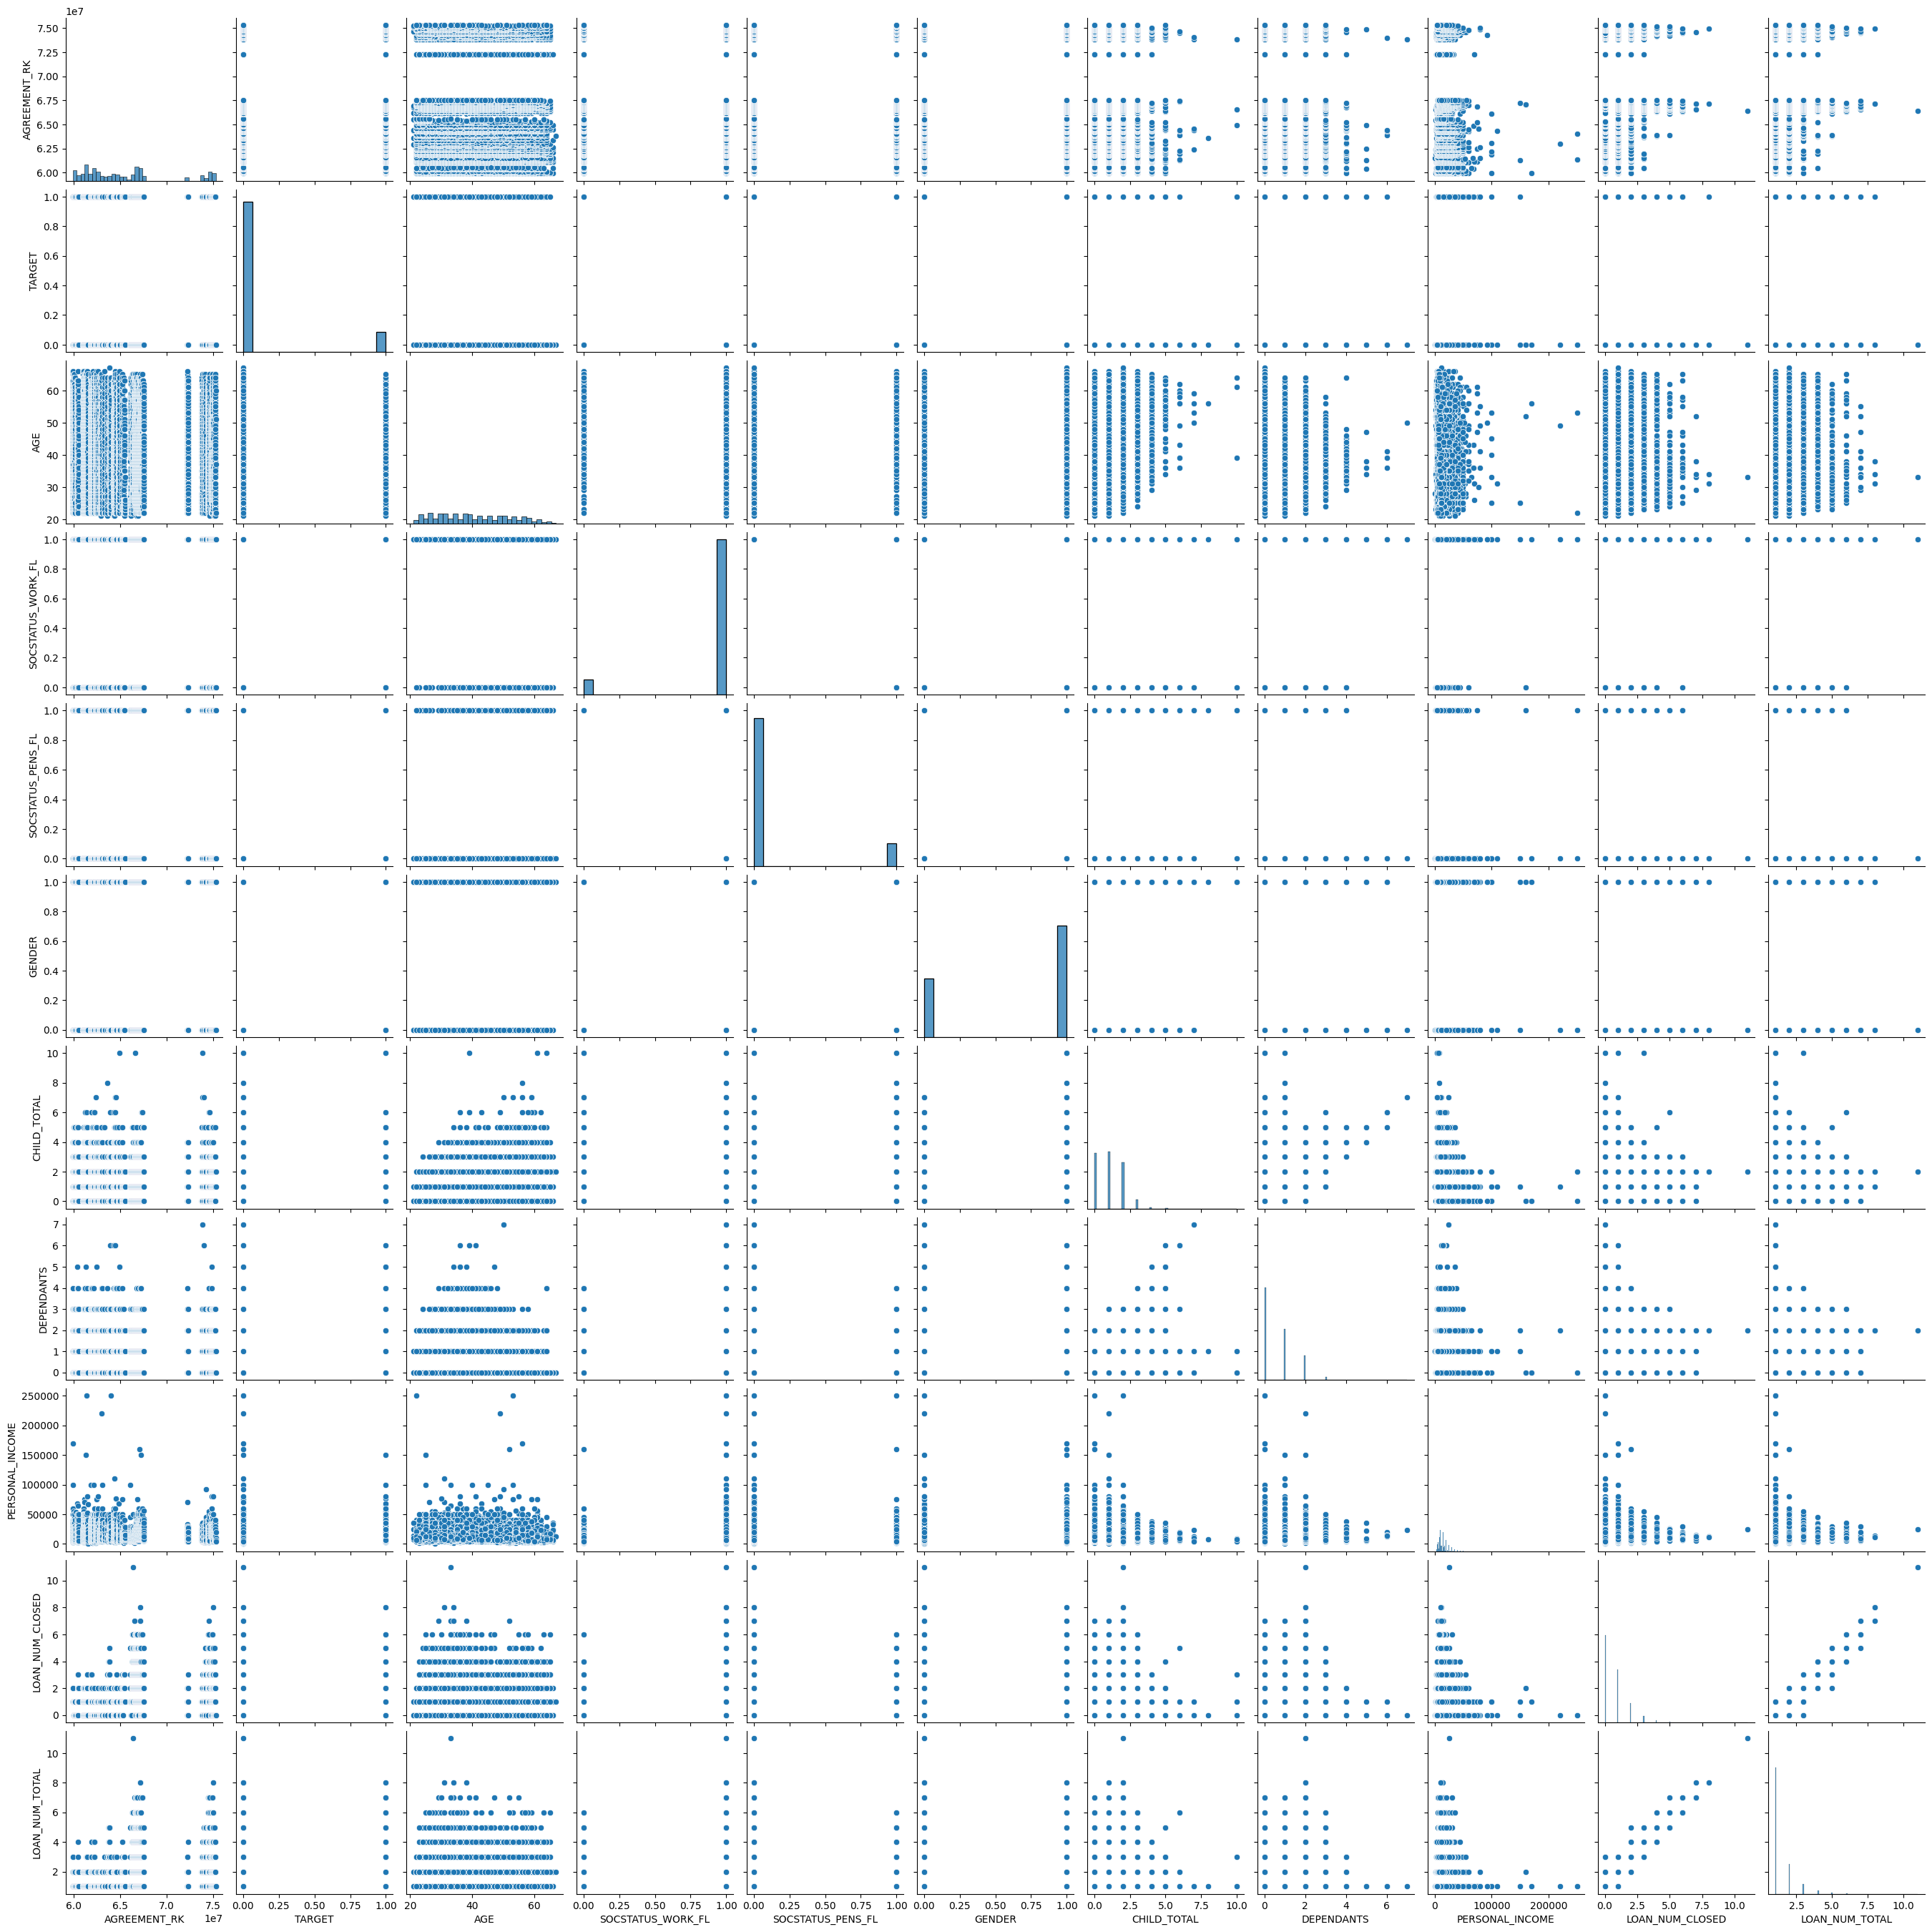

In [80]:
sns.pairplot(total) 

не очень удобно смотреть, да и не для всех колонок нужно, поэтому построим графики распределения признаков немного иначе

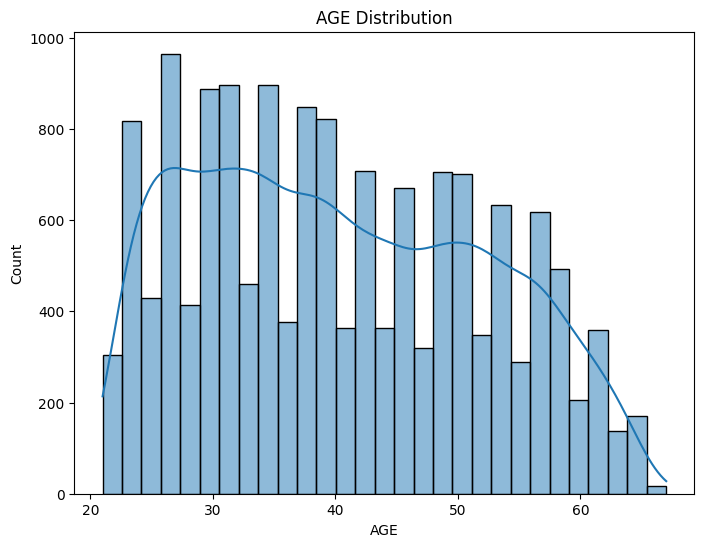

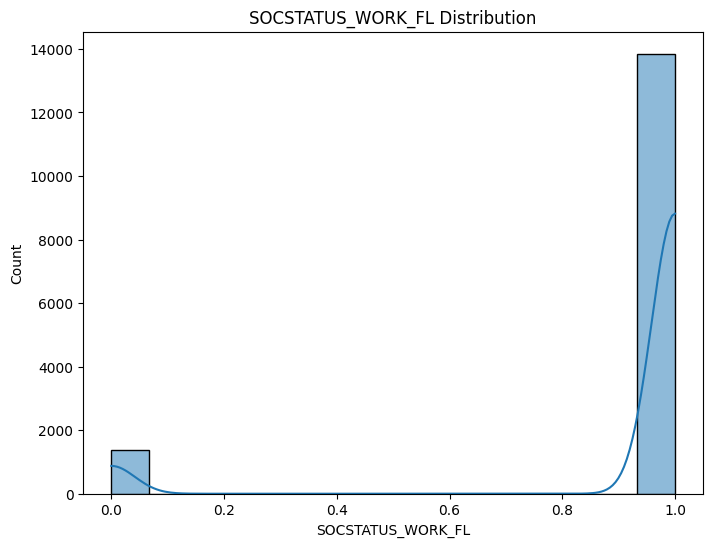

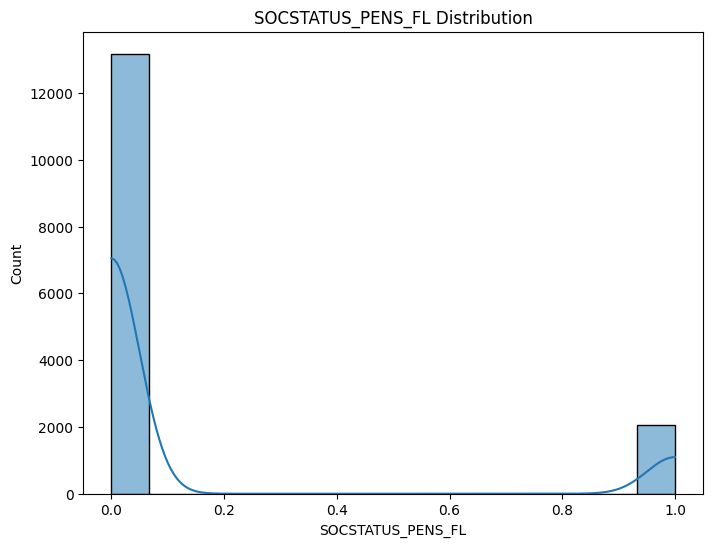

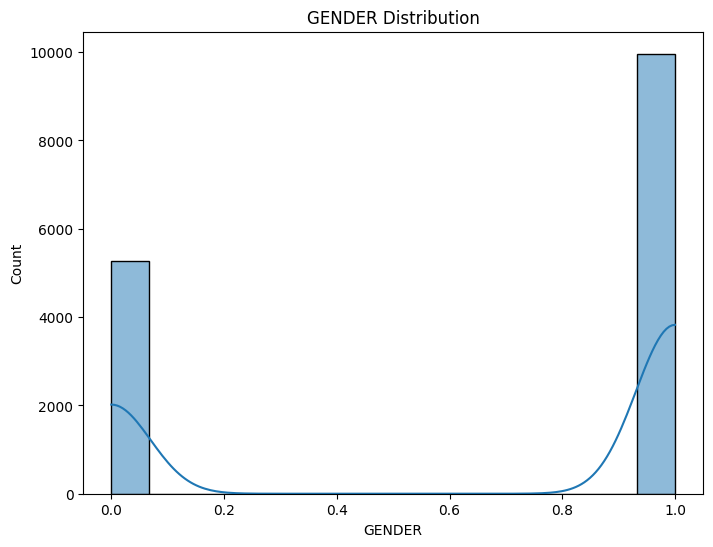

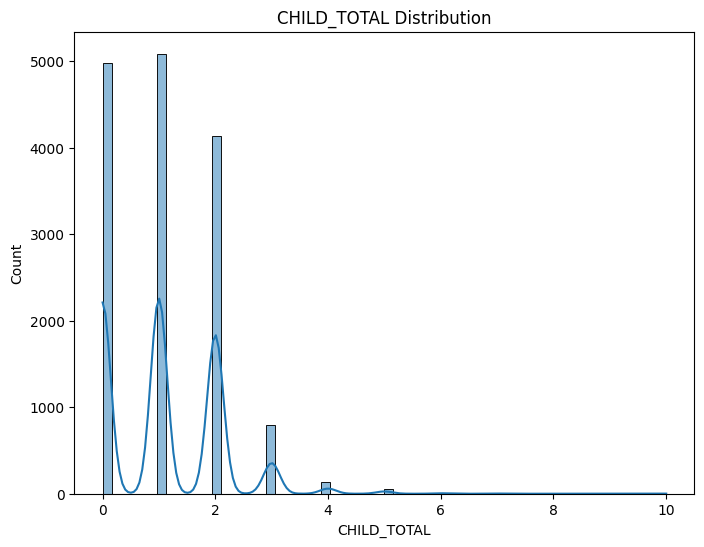

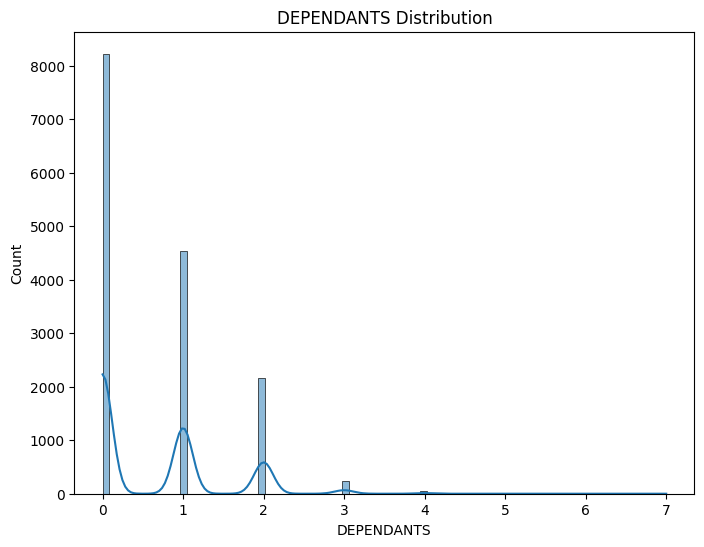

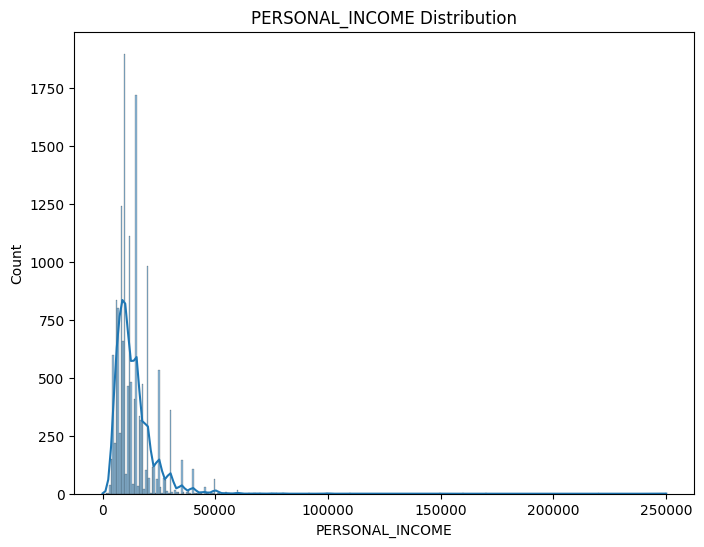

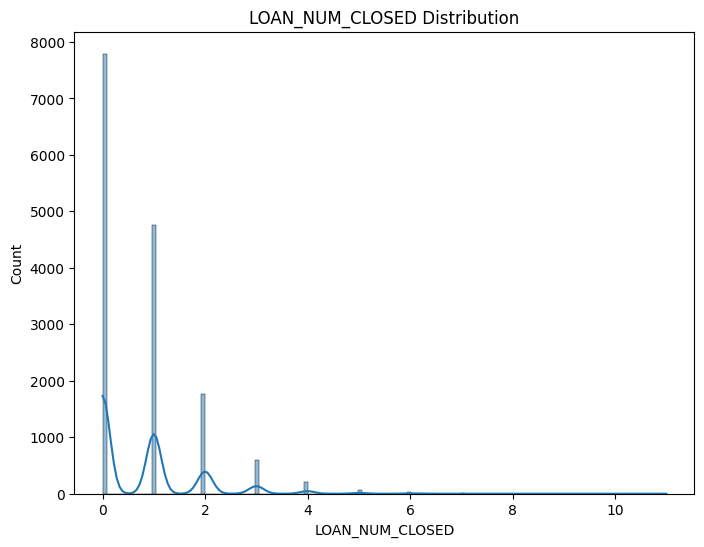

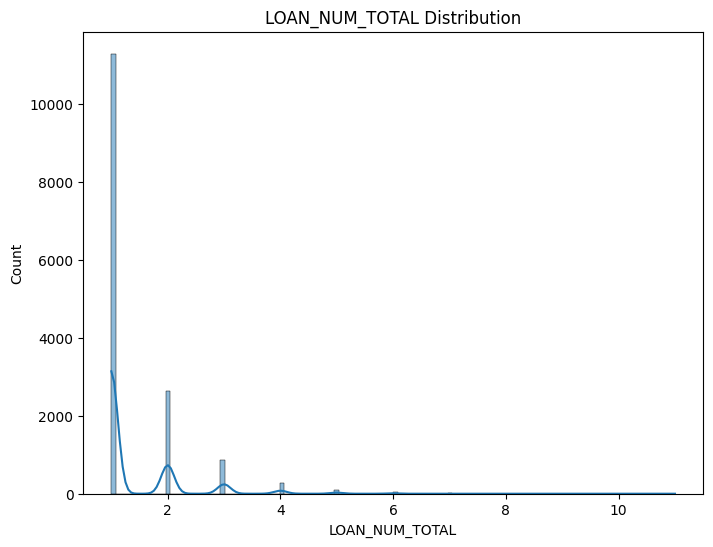

In [92]:
for column in total[['AGE', 'SOCSTATUS_WORK_FL',
       'SOCSTATUS_PENS_FL', 'GENDER', 'CHILD_TOTAL', 'DEPENDANTS',
       'PERSONAL_INCOME', 'LOAN_NUM_CLOSED', 'LOAN_NUM_TOTAL']]:
    plt.figure(figsize=(8, 6))
    sns.histplot(total[column], kde=True)
    plt.title(f"{column} Distribution")
    plt.show()

в целом, глядя на графики распределений признаков, можно отметить значительное разнообразие значений только у признаков AGE и PERSONAL_INCOME, все остальные признаки, несмотря на числовой формат, являются категориальными

построим матрицу корреляций

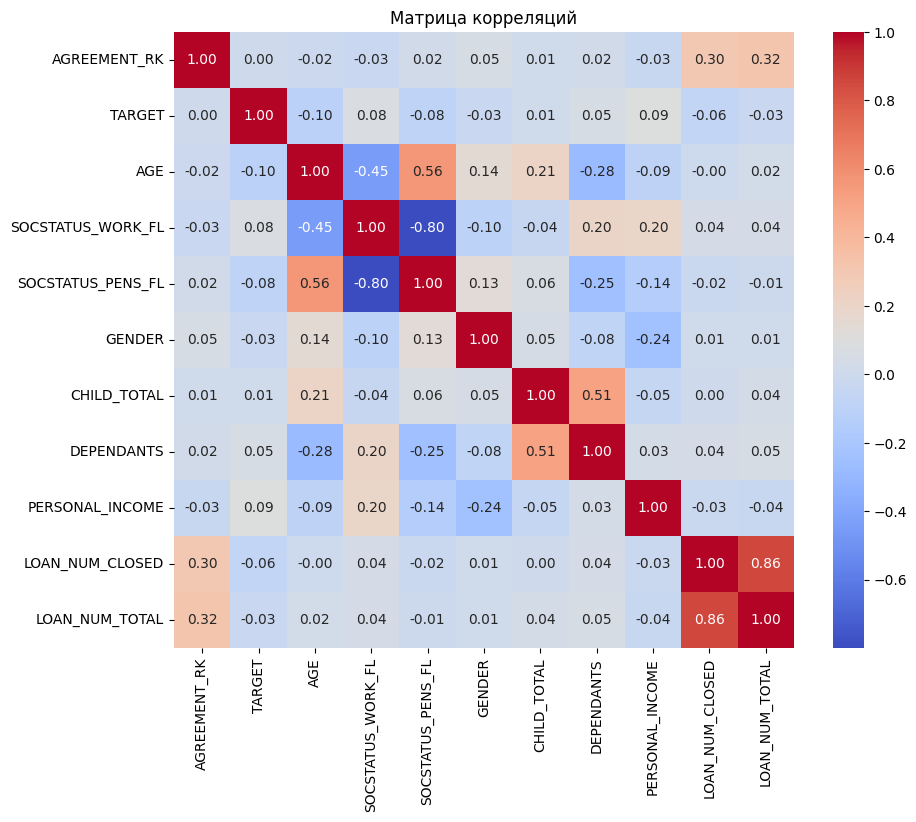

In [86]:
correlation_matrix = total.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Матрица корреляций')
plt.show()

исходя из матрицы корреляций, можно сделать выводы о том, что с целевой переменной признаки скоррелированы слабо, зато есть сильные корреляции (как прямые, так и обратные) между признаками: 'LOAN_NUM_CLOSED' и 'LOAN_NUM_TOTAL', 'CHILD_TOTAL' и 'DEPENDANTS', 'AGE' и 'SOCSTATUS_WORK_FL', 'AGE' и 'SOCSTATUS_PENS_FL', SOCSTATUS_PENS_FL и 'SOCSTATUS_WORK_FL', что во всех случаях соответствует и здравому смыслу

сильных корреляций между таргетом и признаками на матрице корреляций не видно, поэтому нарисуем графики зависимостей целевой переменной и признаков, возможно информации будет больше

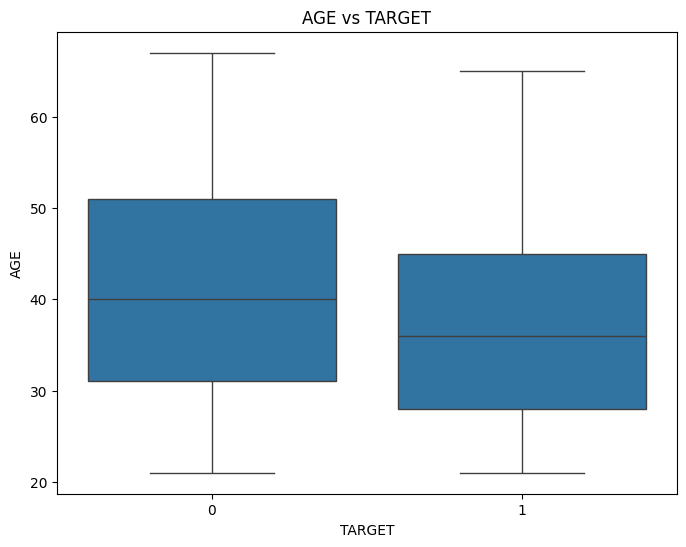

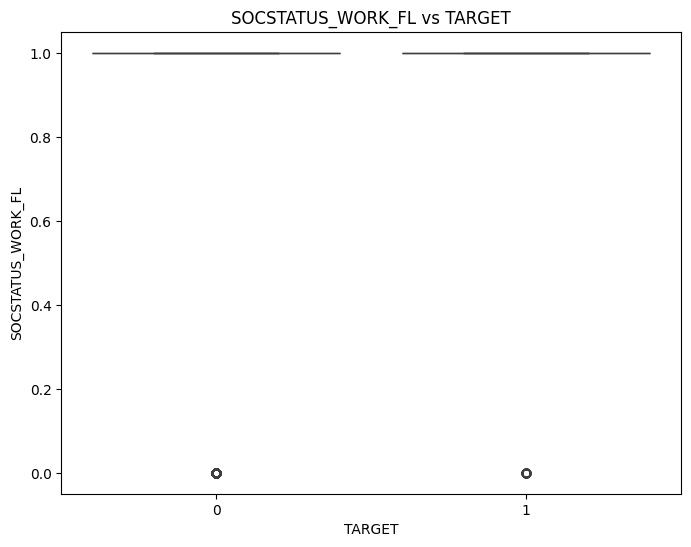

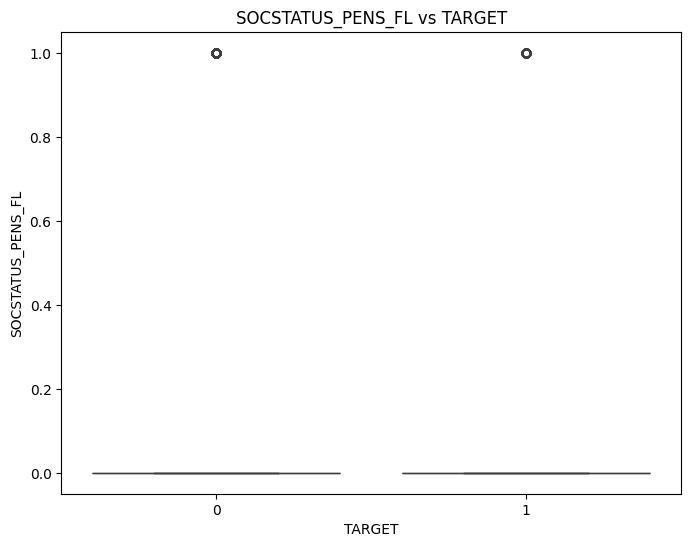

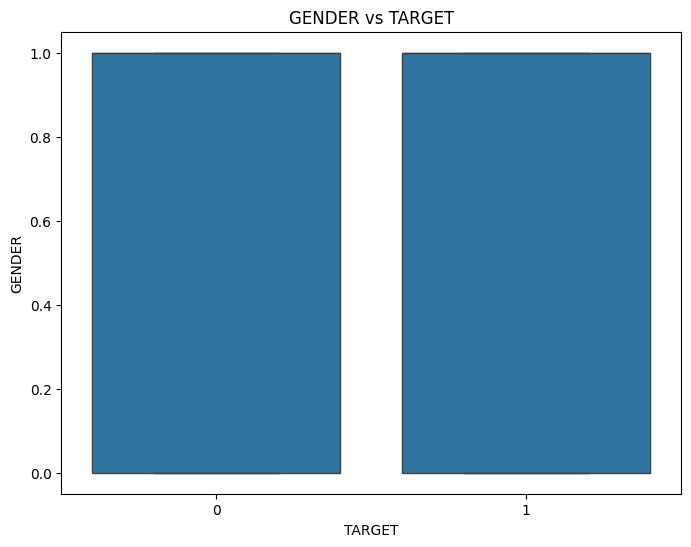

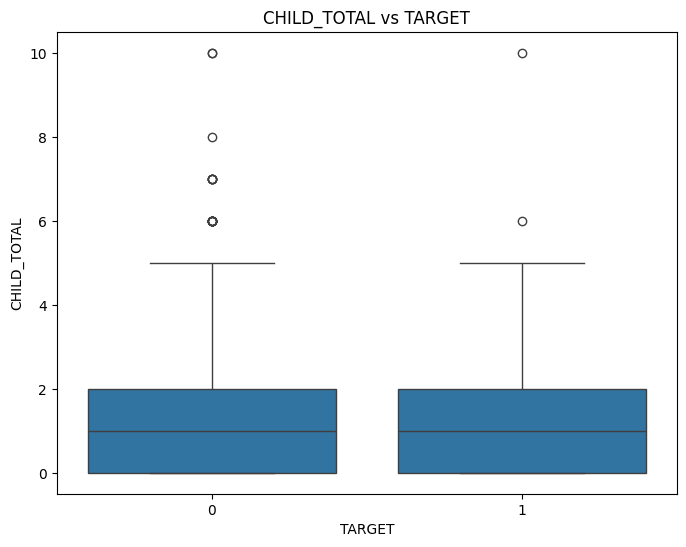

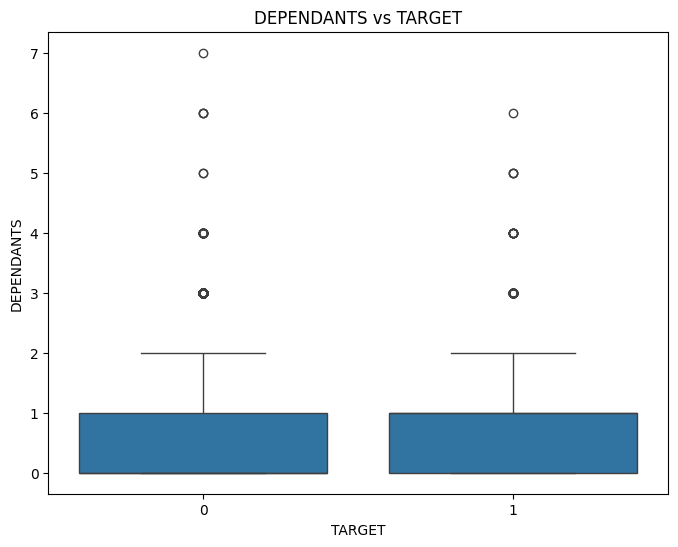

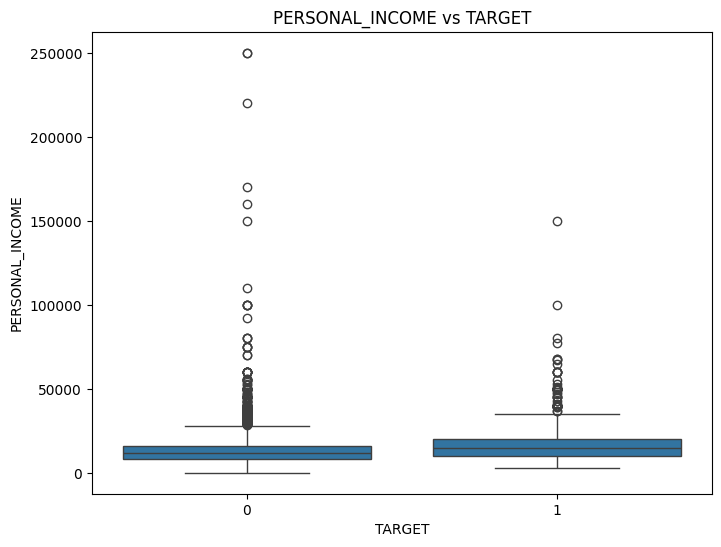

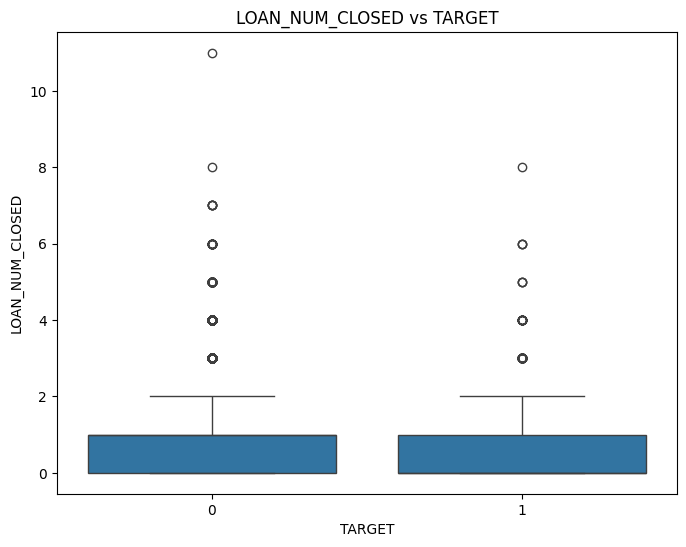

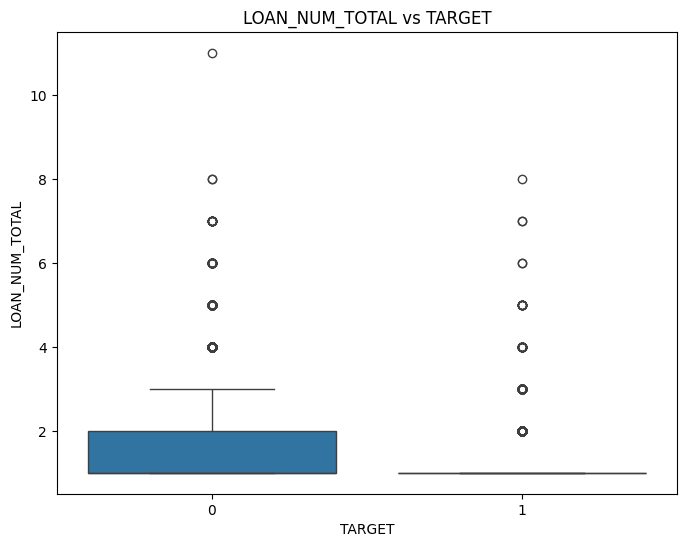

In [100]:
for column in total[['AGE', 'SOCSTATUS_WORK_FL',
       'SOCSTATUS_PENS_FL', 'GENDER', 'CHILD_TOTAL', 'DEPENDANTS',
       'PERSONAL_INCOME', 'LOAN_NUM_CLOSED', 'LOAN_NUM_TOTAL']]:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='TARGET', y=column, data=total)
    plt.title(f"{column} vs TARGET")
    plt.show()

несмотря на "некрасивость" визуализации зависимости некоторых признаков и таргета, можно сделать интересные выводы о том, что  
отклик  в большинстве случаев был зарегистрирован у работающих людей и не пенсионеров, в то время как отклика не было у не работающих и у пенсионеров.

подтвердим наших выводы нехитрыми фильтрациями ниже

In [96]:
total[total.TARGET == 1].SOCSTATUS_WORK_FL.value_counts()

SOCSTATUS_WORK_FL
1    1759
0      53
Name: count, dtype: int64

In [98]:
total[total.TARGET == 1].SOCSTATUS_PENS_FL.value_counts()

SOCSTATUS_PENS_FL
0    1711
1     101
Name: count, dtype: int64

In [97]:
total[total.TARGET == 0].SOCSTATUS_WORK_FL.value_counts()

SOCSTATUS_WORK_FL
1    12088
0     1323
Name: count, dtype: int64

In [99]:
total[total.TARGET == 0].SOCSTATUS_PENS_FL.value_counts()

SOCSTATUS_PENS_FL
0    11465
1     1946
Name: count, dtype: int64

Также можно сделать вывод, что откликов больше у более молодых людей, по гендеру значительных различий в отлике не наблюдается, как и по количеству детей и иждивенцев (но здесь есть выбросы), также отклик наблюдается у людей с бОльшим доходом (но также присутствует много выбросов. 

Интересная картина наблюдается с займами: по количеству закрытых займов значительных различий в отлике не наблюдается, а вот по общему количеству оклика нет у тех, у кого займов больше (что в целом логично, они и так уже закредитованы)